In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt


from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve, GridSearchCV, validation_curve

In [2]:
data1 = pd.read_csv("datasets/pulsar/pulsar_stars.csv", dtype=np.float32)
Y1 = np.array(data1.pop("target_class"))
X1 = np.array(data1)

data2 = pd.read_csv("datasets/mobile/train.csv")
Y2 = np.array(data2.pop("price_range"))
X2 = np.array(data2.copy())

In [3]:
X_train, X_test, y_train, y_test = train_test_split( X1, Y1, test_size = 0.3)
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)

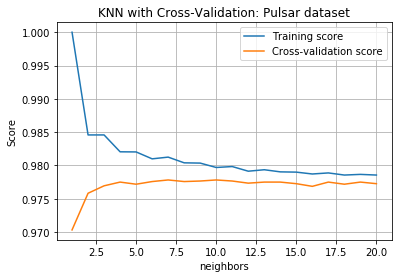

In [4]:
seed = 0
n_cv = 5
max_neighbors = 20

knn = KNeighborsClassifier()
neighbors = np.arange(1,max_neighbors+1)
train_scores, test_scores = validation_curve(knn, x_train_norm, y_train, param_name="n_neighbors", param_range=neighbors, cv=n_cv, n_jobs=-1)

plt.figure()
plt.plot(neighbors, np.mean(train_scores, axis=1), label='Training score')
plt.plot(neighbors, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('KNN with Cross-Validation: Pulsar dataset')
plt.xlabel('neighbors')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


Best parameters for Neural Network:
{'n_neighbors': 7}
Accuracy score of KNN with best parameters is 97.82%
ROC score of KNN with best parameters is 90.93%
F1 score of KNN with best parameters is 88.02%


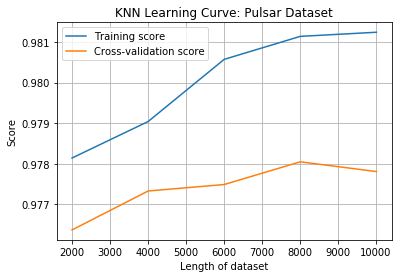

In [5]:
parameters = {'n_neighbors' : neighbors}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid=parameters, cv=n_cv, n_jobs=-1)
clf.fit(x_train_norm, y_train)

print("Best parameters for Neural Network:")
print(clf.best_params_)
y_pred = clf.predict(x_test_norm)
print('Accuracy score of KNN with best parameters is %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print('ROC score of KNN with best parameters is %.2f%%' % (roc_auc_score(y_test, y_pred) * 100))
print('F1 score of KNN with best parameters is %.2f%%' % (f1_score(y_test, y_pred) * 100))

train_sizes=np.linspace(0.2, 1.0, 5)
knn = KNeighborsClassifier(n_neighbors=clf.best_params_['n_neighbors'])
train_sizes, train_scores, test_scores = learning_curve(knn, x_train_norm, y_train, cv=n_cv, train_sizes=train_sizes, n_jobs = -1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure()
plt.title("KNN Learning Curve: Pulsar Dataset")
plt.xlabel("Length of dataset")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.show()

Text(0.5, 0, 'False Positive Rate')

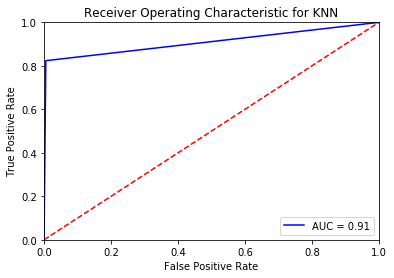

In [6]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic for KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [7]:
#Mobile dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X2, Y2, test_size = 0.3)
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# x_train_norm = X_train
# x_test_norm = X_test
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)

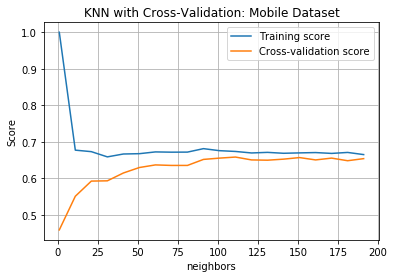

In [9]:
seed = 0
n_cv = 5
max_neighbors = 200

knn = KNeighborsClassifier()
neighbors = np.arange(1,max_neighbors+1,10)
train_scores, test_scores = validation_curve(knn, x_train_norm, y_train, param_name="n_neighbors", param_range=neighbors, cv=n_cv, n_jobs=-1)

plt.figure()
plt.plot(neighbors, np.mean(train_scores, axis=1), label='Training score')
plt.plot(neighbors, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('KNN with Cross-Validation: Mobile Dataset')
plt.xlabel('neighbors')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


Best parameters for Neural Network:
{'n_neighbors': 111}
Accuracy score of KNN with best parameters is 63.50%


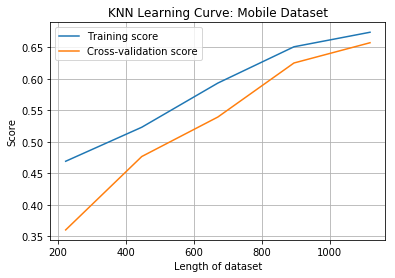

In [10]:
parameters = {'n_neighbors' : neighbors}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid=parameters, cv=n_cv, n_jobs=-1)
clf.fit(x_train_norm, y_train)

print("Best parameters for Neural Network:")
print(clf.best_params_)
y_pred = clf.predict(x_test_norm)
print('Accuracy score of KNN with best parameters is %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

train_sizes=np.linspace(0.2, 1.0, 5)
knn = KNeighborsClassifier(n_neighbors=clf.best_params_['n_neighbors'])
train_sizes, train_scores, test_scores = learning_curve(knn, x_train_norm, y_train, cv=n_cv, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure()
plt.title("KNN Learning Curve: Mobile Dataset")
plt.xlabel("Length of dataset")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.show()

Confusion matrix, without normalization
[[123  24   3   0]
 [ 44  58  54   1]
 [  3  16 103  16]
 [  0   0  58  97]]


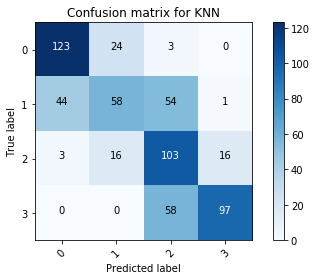

In [11]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3],
                      title='Confusion matrix for KNN')
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X1, Y1, test_size = 0.3)
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)
knn = KNeighborsClassifier(n_neighbors = 7)

%timeit knn.fit(x_train_norm, y_train)

%timeit knn.predict(x_train_norm)


5.5 ms ± 328 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
125 ms ± 3.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
X_train, X_test, y_train, y_test = train_test_split( X1, Y1, test_size = 0.3)
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)
knn = KNeighborsClassifier(n_neighbors = 7)
%timeit knn.fit(x_train_norm, y_train)

%timeit knn.predict(x_train_norm)


5.68 ms ± 245 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
136 ms ± 2.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
